In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Loading & Inspection

In [4]:
# reading the dataset 

house_data = pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check dataset dimensions

house_data.shape

(1460, 81)

In [6]:
# statistical overview

house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# checking data info

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# checking percentage of null values

round((house_data.isnull().sum()/house_data.shape[0])*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# checking numerical data

num_data = house_data.select_dtypes(include = ['float64','int64'])
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# checking categorical data

cat_data = house_data.select_dtypes(include = ['object'])
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
# checking value counts of colums with null values

col_list = ['Alley','FireplaceQu','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
           'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','GarageYrBlt']
for col in col_list:
    print(house_data[col].value_counts(normalize=True),'\n')
    

Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64 

Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: FireplaceQu, dtype: float64 

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64 

TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64 

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64 

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64 

Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64 

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64 

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64 

TA    0.950689
Fa    0.034808
Gd    

In [12]:
# replacing null values with appropriate values by business knowledge

house_data['Alley'].fillna('No Alley', inplace=True)
house_data['FireplaceQu'].fillna('No Fireplace', inplace=True)

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']:
    house_data[col].fillna('No Basement',inplace=True)


for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    house_data[col].fillna('No Garage',inplace=True)

house_data['PoolQC'].fillna('No Pool', inplace=True)
house_data['Fence'].fillna('No Fence', inplace=True)
house_data['MiscFeature'].fillna('None', inplace=True)
house_data['GarageYrBlt'].fillna(2005, inplace=True)

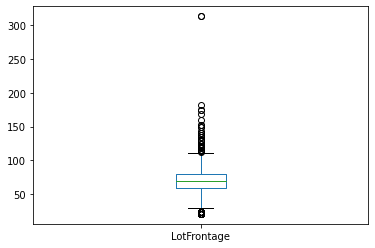

In [13]:
house_data['LotFrontage'].plot.box();

In [14]:
# replacing with mean value for 'LotFrontage'

house_data['LotFrontage'].fillna((house_data['LotFrontage'].mean()), inplace = True)

In [15]:
# dropping nulls in these columns as they are less than 5%

house_data.dropna(subset=['MasVnrType', 'MasVnrArea','Electrical'], axis=0, inplace=True)

In [16]:
# recheck null counts after imputation

round((house_data.isnull().sum()/house_data.shape[0])*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

In [17]:
# checking duplicate records

house_data.duplicated().sum()

0

### EDA & Data Preprocessing

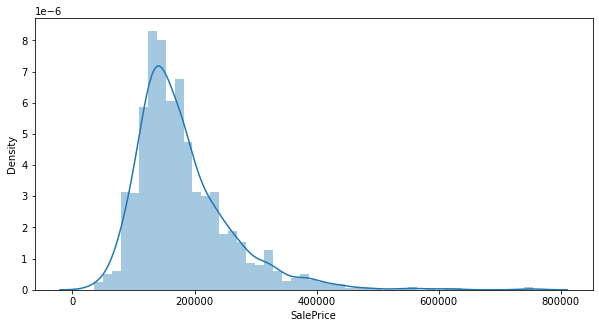

In [18]:
# checking if target variable is normally distributed/not

plt.figure(figsize=(10,5))
sns.distplot(house_data['SalePrice'])
plt.show()

In [19]:
# checking all numerical columns and plotting their scatterplot w.r.t SalePrice

num_data = house_data.select_dtypes(include = ['float64','int64'])
print(len(num_data.columns))
print(num_data.columns)

38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')


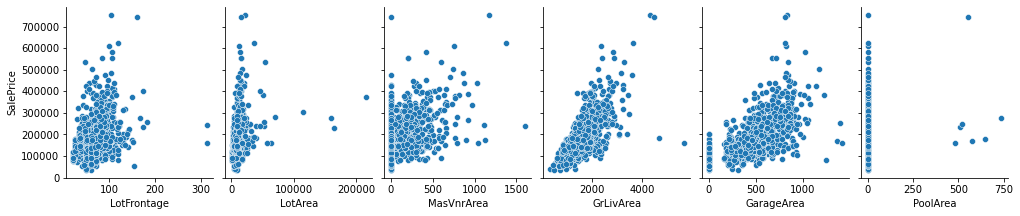

In [20]:
sns.pairplot(house_data, y_vars='SalePrice', x_vars=['LotFrontage', 'LotArea','MasVnrArea','GrLivArea','GarageArea','PoolArea'], height=3, aspect=0.8, diag_kind = None);

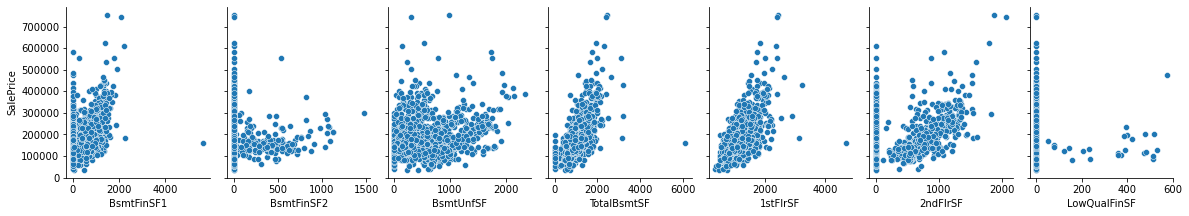

In [21]:
sns.pairplot(house_data, y_vars='SalePrice', x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], height=3, aspect=0.8, diag_kind = None);

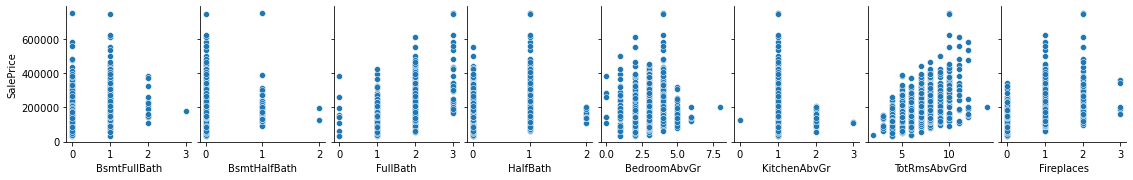

In [22]:
sns.pairplot(house_data, y_vars='SalePrice', x_vars=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], height=2.5, aspect=0.8, diag_kind = None);

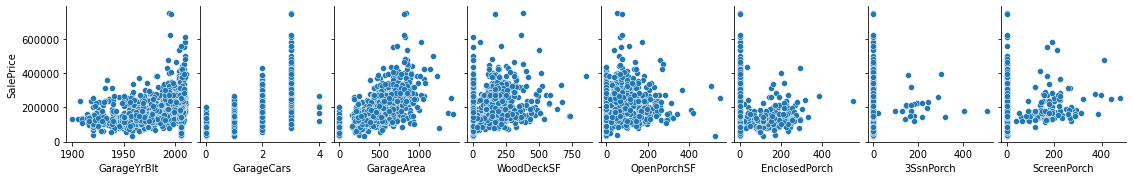

In [23]:
sns.pairplot(house_data, y_vars='SalePrice', x_vars=['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], height=2.5, aspect=0.8, diag_kind = None);

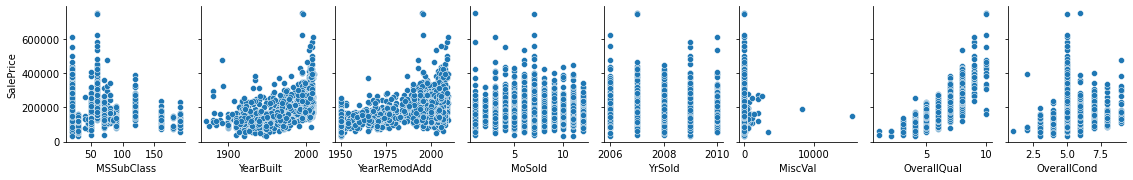

In [24]:
sns.pairplot(house_data, y_vars='SalePrice', x_vars=['MSSubClass','YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','MiscVal','OverallQual', 'OverallCond'], height=2.5, aspect=0.8, diag_kind = None);

In [25]:
# replacing the numbers with labels in 'MSSubClass' column

house_data['MSSubClass'] = house_data['MSSubClass'].map({ 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
house_data['MSSubClass'].unique()

array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1945 & OLDER', '1-1/2 STORY FINISHED ALL AGES',
       '2 FAMILY CONVERSION - ALL STYLES AND AGES',
       '1-1/2 STORY - UNFINISHED ALL AGES',
       'DUPLEX - ALL STYLES AND AGES',
       '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-STORY 1945 & OLDER', 'SPLIT FOYER', 'SPLIT OR MULTI-LEVEL',
       '2-STORY PUD - 1946 & NEWER', '2-1/2 STORY ALL AGES',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '1-STORY W/FINISHED ATTIC ALL AGES'], dtype=object)

In [26]:
# checking categorical columns

cat_data = house_data.select_dtypes(include = ['object'])
print(cat_data.columns)


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')


In [27]:
col_list = list(cat_data.columns)
col_list.remove('MSSubClass')

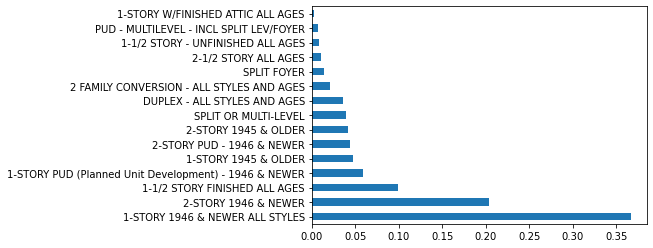

In [28]:
# countplot for 'MSSubClass'

house_data['MSSubClass'].value_counts(normalize=True).plot.barh();

In [29]:
# checking countplot for each categorical column

def count_plotter(my_list,x,y):
    
    fig,axes = plt.subplots(x,y,figsize=(20,15))
    fig.tight_layout()

    for i,ax in zip(range(len(my_list)),axes.flat):
        house_data[my_list[i]].value_counts(normalize=True).plot.bar(ax=ax)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.35)
        ax.set_title(my_list[i])
        ax.tick_params(axis='x',labelrotation=90)
    plt.show()

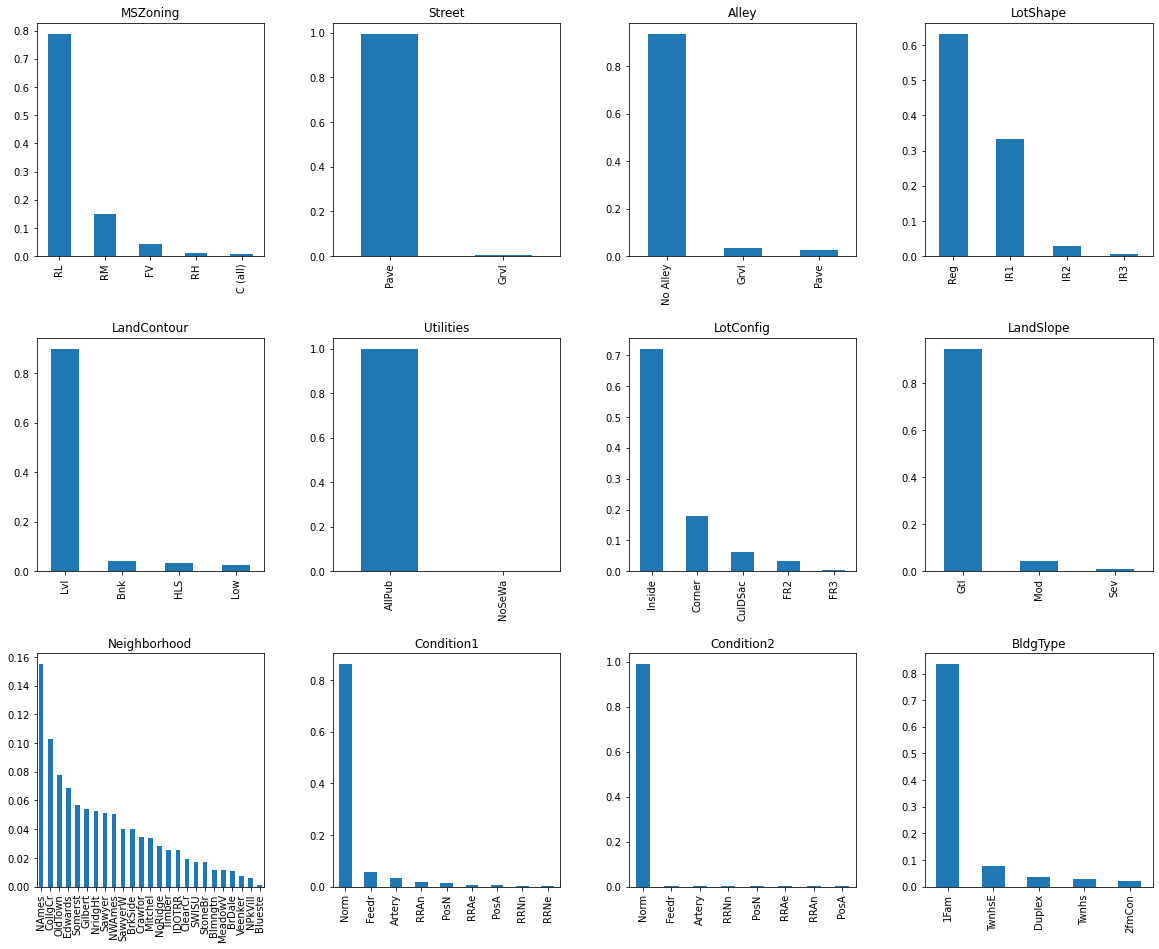

In [30]:
count_plotter(col_list[0:12],3,4)

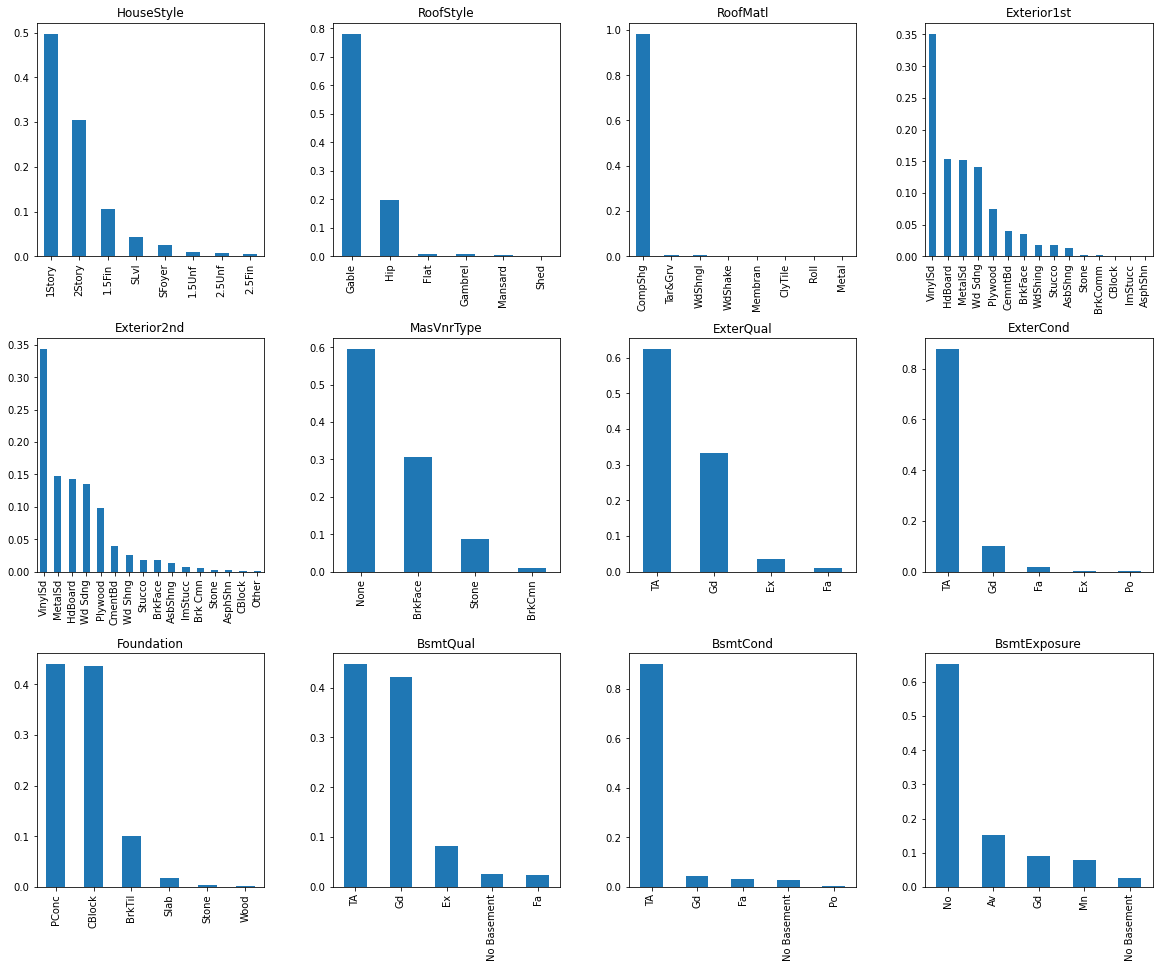

In [31]:
count_plotter(col_list[12:24],3,4)

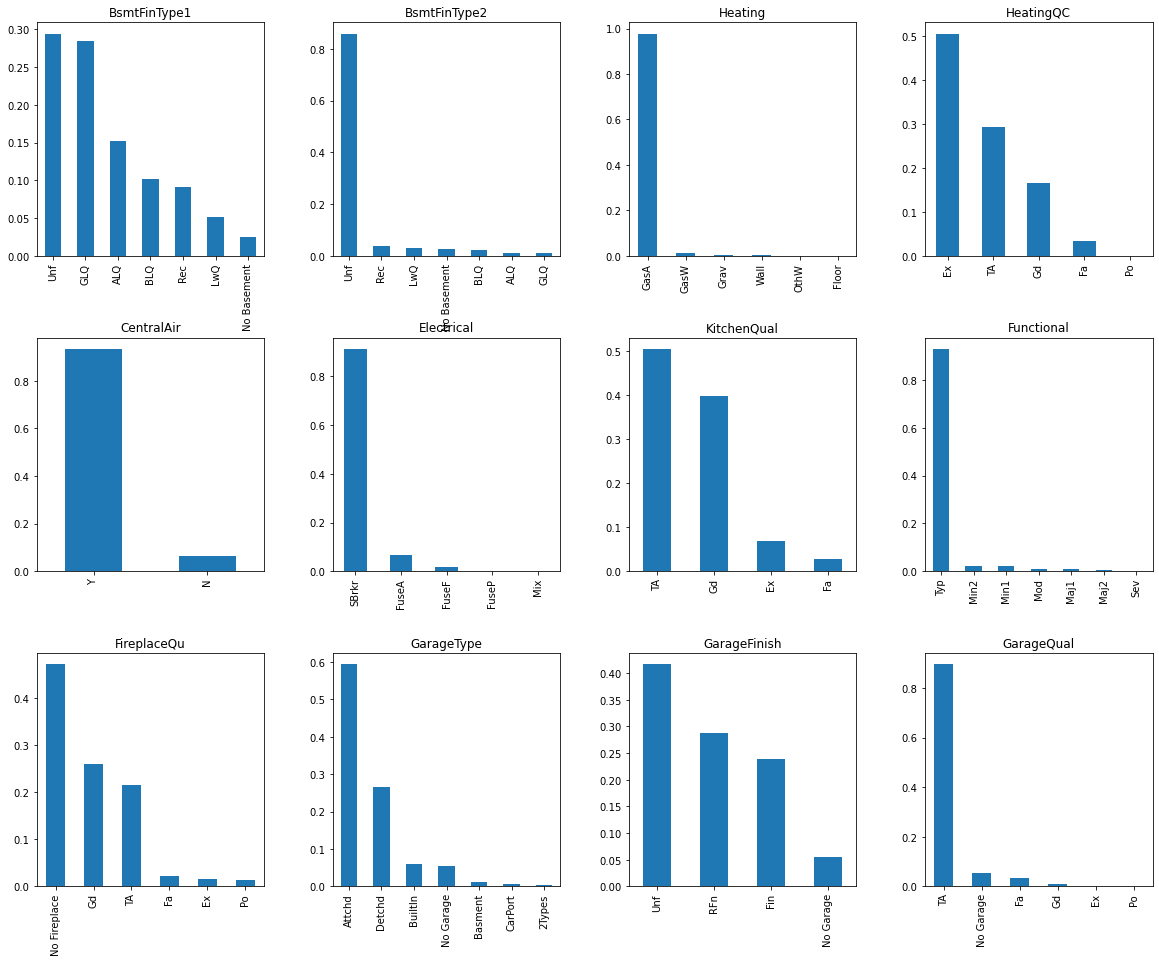

In [32]:
count_plotter(col_list[24:36],3,4)

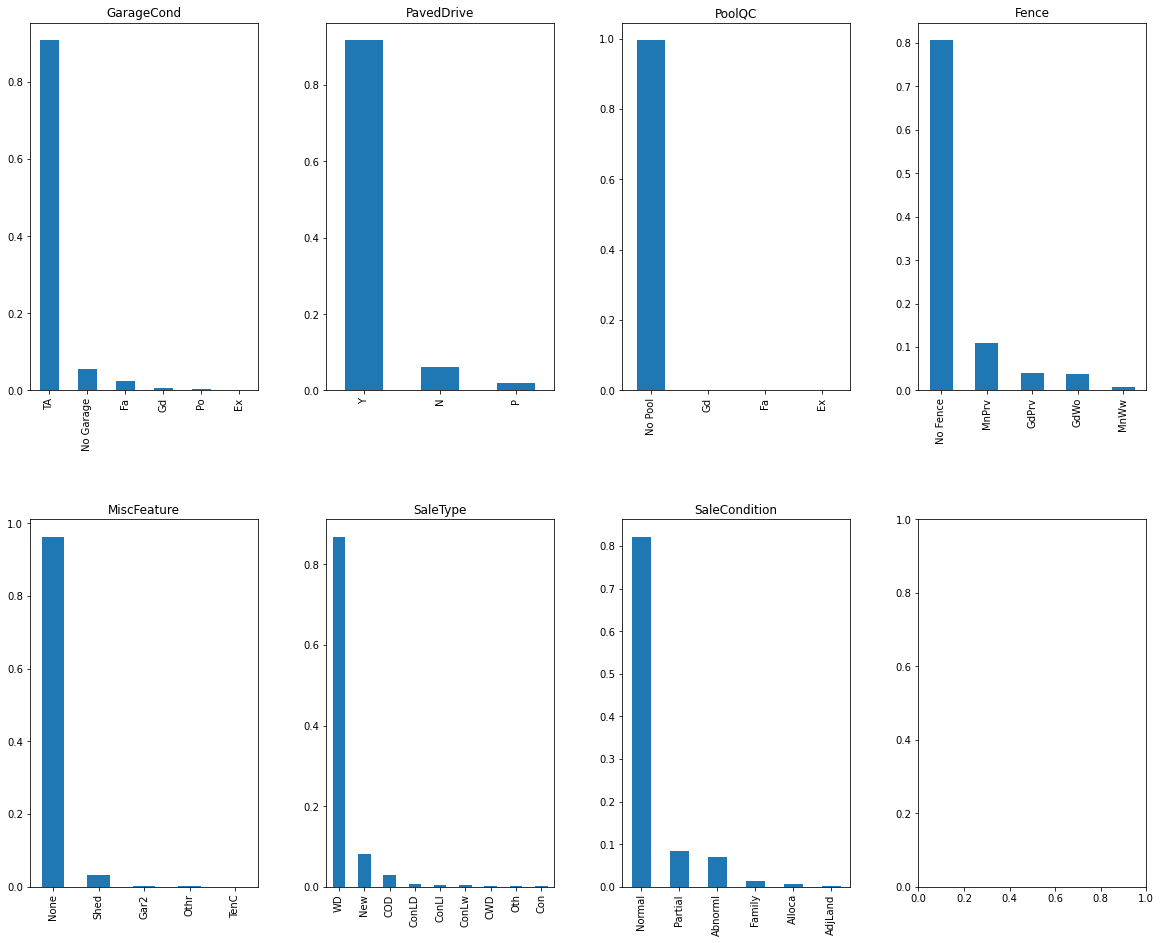

In [33]:
count_plotter(col_list[36:],2,4)

In [34]:
# dropping categorical columns that have highly skewed data (>85% imbalance to a certain value)

cols = ['Street', 'Alley','LandContour', 'Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType', 
        'RoofMatl', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical','Functional', 'GarageQual', 
        'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType','SaleCondition']
house_data.drop(cols, axis=1, inplace=True)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,2008,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,2007,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,2008,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,2006,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,2008,250000


In [35]:
cat_data = house_data.select_dtypes(include = ['object'])
print(cat_data.columns)


Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence'], dtype='object')


In [36]:
# mapping ordinal variables to numerical values

house_data['LotShape'] = house_data['LotShape'].map({"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4})

house_data['ExterQual'] = house_data['ExterQual'].map({"Fa" : 1, "TA": 2, "Gd": 3, "Ex" : 4})

house_data['ExterCond'] = house_data['ExterCond'].map({"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5})

house_data['BsmtQual'] = house_data['BsmtQual'].map({"No Basement" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5 })

house_data['BsmtCond'] = house_data['BsmtCond'].map({"No Basement" : 1,"Po" : 2, "Fa" : 3, "TA": 4, "Gd" : 5})

house_data['BsmtExposure'] = house_data['BsmtExposure'].map({"No Basement" : 1, "No" : 2, "Mn" : 3, "Av": 4, "Gd" : 5 })

house_data['BsmtFinType1'] = house_data['BsmtFinType1'].map({"No Basement" : 1, "Unf" : 2, "LwQ": 3, "Rec" : 4,"BLQ" : 5, "ALQ" : 6, "GLQ" : 7})

house_data['HeatingQC'] = house_data['HeatingQC'].map({"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

house_data['KitchenQual'] = house_data['KitchenQual'].map({"Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})

house_data['FireplaceQu'] = house_data['FireplaceQu'].map({"No Fireplace" : 1, "Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6})

house_data['GarageFinish'] = house_data['GarageFinish'].map({"No Garage" : 1, "Unf" : 2, "RFn" : 3, "Fin" : 4})

house_data['Fence'] = house_data['Fence'].map({"No Fence" : 1, "MnWw" : 2, "GdWo" : 3, "MnPrv": 4,  "GdPrv" : 5})

In [37]:
cat_data = house_data.select_dtypes(include = ['object'])
print(cat_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType'], dtype='object')


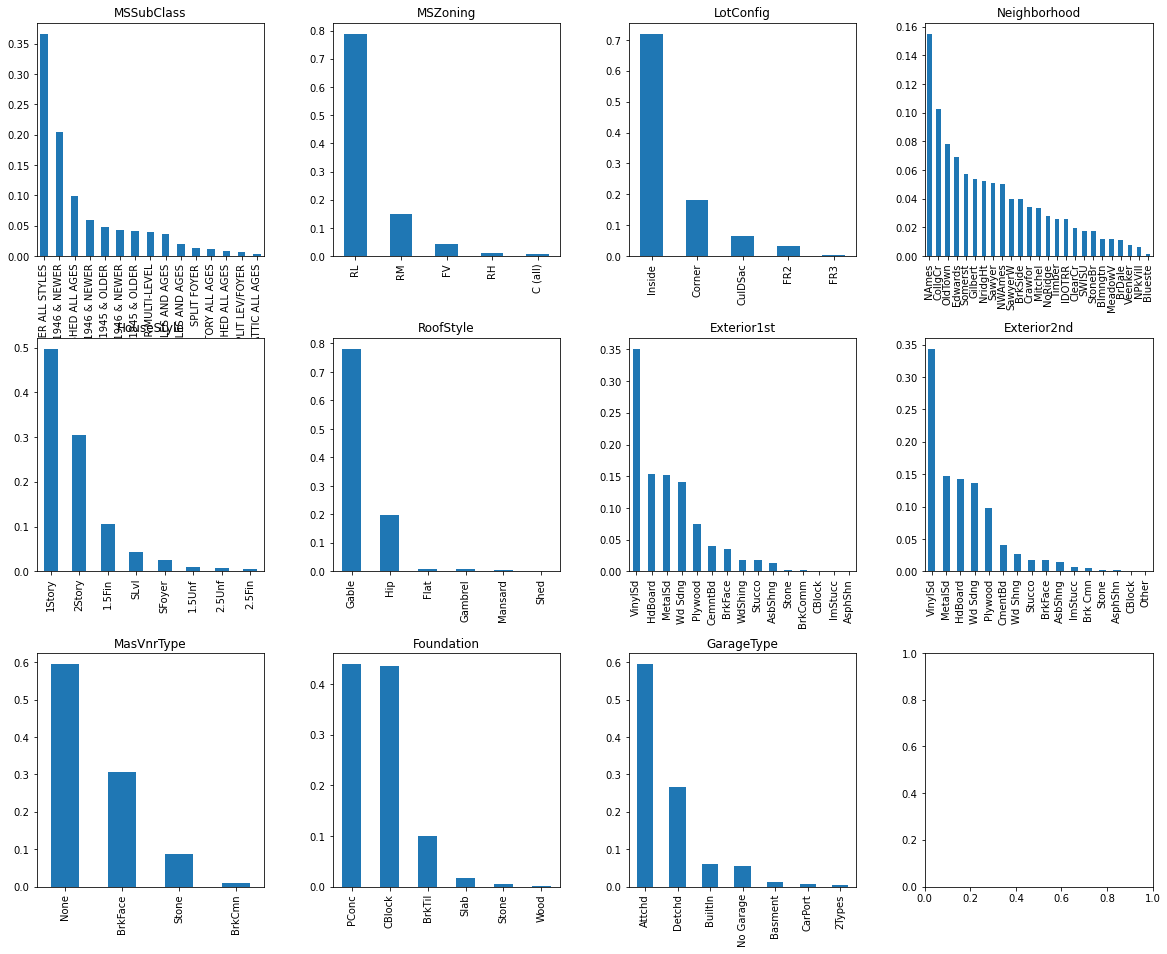

In [38]:
col_list = list(cat_data.columns)
count_plotter(col_list,3,4)

In [39]:
# function to group multiple values in categorical columns to 'Others' if their percentage is less than a threshold
# this is used to reduce the number of dummy variables that will be create during encoding

def categorical_val_reducer(col,threshold):    
    ms_zoning = house_data[col].value_counts(normalize=True)*100
    condition = ms_zoning<threshold
    index_dict = dict.fromkeys(ms_zoning[condition].index,'Others')
    house_data[col] = house_data[col].replace(index_dict)

In [40]:
house_data['MSZoning'].value_counts(normalize=True)*100

RL         78.911096
RM         15.024121
FV          4.272915
RH          1.102688
C (all)     0.689180
Name: MSZoning, dtype: float64

In [41]:
# mapping categories in 'MSZoning' with threshold < 5%

categorical_val_reducer('MSZoning',5)
house_data['MSZoning'].value_counts(normalize=True)*100

RL        78.911096
RM        15.024121
Others     6.064783
Name: MSZoning, dtype: float64

In [42]:
house_data['LotConfig'].value_counts(normalize=True)*100

Inside     72.019297
Corner     18.056513
CulDSac     6.409373
FR2         3.239145
FR3         0.275672
Name: LotConfig, dtype: float64

In [43]:
# mapping categories in 'LotConfig' with threshold < 10%

categorical_val_reducer('LotConfig',10)
house_data['LotConfig'].value_counts(normalize=True)*100

Inside    72.019297
Corner    18.056513
Others     9.924190
Name: LotConfig, dtype: float64

In [44]:
house_data['RoofStyle'].value_counts(normalize=True)*100

Gable      78.084080
Hip        19.641626
Flat        0.895934
Gambrel     0.758098
Mansard     0.482426
Shed        0.137836
Name: RoofStyle, dtype: float64

In [45]:
# mapping categories in 'RoofStyle' with threshold < 20%

categorical_val_reducer('RoofStyle',20)
house_data['RoofStyle'].value_counts(normalize=True)*100

Gable     78.08408
Others    21.91592
Name: RoofStyle, dtype: float64

In [46]:
house_data['HouseStyle'].value_counts(normalize=True)*100

1Story    49.689869
2Story    30.461751
1.5Fin    10.613370
SLvl       4.410751
SFoyer     2.549966
1.5Unf     0.964852
2.5Unf     0.758098
2.5Fin     0.551344
Name: HouseStyle, dtype: float64

In [47]:
# mapping categories in 'HouseStyle' with threshold < 10%

categorical_val_reducer('HouseStyle',10)
house_data['HouseStyle'].value_counts(normalize=True)*100

1Story    49.689869
2Story    30.461751
1.5Fin    10.613370
Others     9.235010
Name: HouseStyle, dtype: float64

In [48]:
house_data['Exterior1st'].value_counts(normalize=True)*100

VinylSd    35.079256
HdBoard    15.299793
MetalSd    15.161957
Wd Sdng    14.128187
Plywood     7.443143
CemntBd     4.066161
BrkFace     3.445899
WdShing     1.791868
Stucco      1.722950
AsbShng     1.378360
Stone       0.137836
BrkComm     0.137836
CBlock      0.068918
ImStucc     0.068918
AsphShn     0.068918
Name: Exterior1st, dtype: float64

In [49]:
# mapping categories in 'Exterior1st' with threshold < 14%

categorical_val_reducer('Exterior1st',14)
house_data['Exterior1st'].value_counts(normalize=True)*100

VinylSd    35.079256
Others     20.330806
HdBoard    15.299793
MetalSd    15.161957
Wd Sdng    14.128187
Name: Exterior1st, dtype: float64

In [50]:
house_data['Exterior2nd'].value_counts(normalize=True)*100

VinylSd    34.321158
MetalSd    14.748449
HdBoard    14.266023
Wd Sdng    13.576844
Plywood     9.786354
CmentBd     3.997243
Wd Shng     2.618884
Stucco      1.791868
BrkFace     1.722950
AsbShng     1.378360
ImStucc     0.689180
Brk Cmn     0.482426
Stone       0.275672
AsphShn     0.206754
CBlock      0.068918
Other       0.068918
Name: Exterior2nd, dtype: float64

In [51]:
# mapping categories in 'Exterior2nd' with threshold < 9%

categorical_val_reducer('Exterior2nd',9)
house_data['Exterior2nd'].value_counts(normalize=True)*100

VinylSd    34.321158
MetalSd    14.748449
HdBoard    14.266023
Wd Sdng    13.576844
Others     13.301172
Plywood     9.786354
Name: Exterior2nd, dtype: float64

In [52]:
house_data['Foundation'].value_counts(normalize=True)*100

PConc     43.969676
CBlock    43.694004
BrkTil    10.062026
Slab       1.654032
Stone      0.413508
Wood       0.206754
Name: Foundation, dtype: float64

In [53]:
# mapping categories in 'Foundation' with threshold < 11%

categorical_val_reducer('Foundation',11)
house_data['Foundation'].value_counts(normalize=True)*100

PConc     43.969676
CBlock    43.694004
Others    12.336320
Name: Foundation, dtype: float64

In [54]:
house_data['GarageType'].value_counts(normalize=True)*100

Attchd       59.476223
Detchd       26.671261
BuiltIn       5.926947
No Garage     5.582357
Basment       1.309442
CarPort       0.620262
2Types        0.413508
Name: GarageType, dtype: float64

In [55]:
# mapping categories in 'GarageType' with threshold < 10%

categorical_val_reducer('GarageType',10)
house_data['GarageType'].value_counts(normalize=True)*100

Attchd    59.476223
Detchd    26.671261
Others    13.852516
Name: GarageType, dtype: float64

In [56]:
# checking categorical columns 

cat_data = house_data.select_dtypes(include = ['object'])
print(cat_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType'], dtype='object')


In [57]:
# checking numerical columns 

num_data = house_data.select_dtypes(include = ['float64','int64'])
print(num_data.columns)

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')


In [58]:
for col in ['MoSold', 'YrSold','YearBuilt', 'YearRemodAdd','GarageYrBlt']:
    print(col,':',house_data[col].dtype)

MoSold : int64
YrSold : int64
YearBuilt : int64
YearRemodAdd : int64
GarageYrBlt : float64


In [59]:
# convert dtype of GarageYrBlt to int

house_data['GarageYrBlt'] = house_data['GarageYrBlt'].astype(int)
house_data['GarageYrBlt'].dtype

dtype('int64')

In [60]:
# checking value counts of year and month columns

for col in ['MoSold', 'YrSold','YearBuilt', 'YearRemodAdd','GarageYrBlt']:
    print(house_data[col].value_counts(normalize=True)*100,'\n')
    


6     17.436251
7     16.126809
5     13.852516
4      9.717436
8      8.339076
3      7.167471
10     6.133701
11     5.375603
9      4.272915
1      3.997243
12     3.997243
2      3.583735
Name: MoSold, dtype: float64 

2009    23.225362
2007    22.536182
2006    21.571330
2008    20.675396
2010    11.991730
Name: YrSold, dtype: float64 

2006    4.410751
2005    4.410751
2004    3.721571
2007    3.239145
2003    3.032391
1976    2.274294
1977    2.205376
1920    2.067540
1959    1.791868
1998    1.722950
1999    1.722950
1970    1.654032
1954    1.654032
2000    1.654032
1958    1.654032
1965    1.654032
2008    1.585114
1972    1.585114
1968    1.516196
1971    1.516196
2002    1.447278
2001    1.378360
1950    1.378360
1962    1.309442
1994    1.309442
1957    1.309442
1940    1.240524
2009    1.240524
1995    1.240524
1966    1.240524
1960    1.171606
1910    1.171606
1993    1.171606
1967    1.102688
1978    1.102688
1963    1.102688
1955    1.102688
1925    1.102688
1964    1.

In [61]:
# replacing MoSold to months of calendar

house_data['MoSold'] = house_data['MoSold'].apply(lambda x: calendar.month_name[x])
house_data['MoSold'].value_counts(normalize=True)*100

June         17.436251
July         16.126809
May          13.852516
April         9.717436
August        8.339076
March         7.167471
October       6.133701
November      5.375603
September     4.272915
December      3.997243
January       3.997243
February      3.583735
Name: MoSold, dtype: float64

In [62]:
# derived variable 'House_Age' which tells how old the house is from year of being built to present day

house_data['House_Age'] = 2021 - house_data['YearBuilt']
house_data.drop(['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'], axis=1, inplace = True)

In [63]:
print(house_data['House_Age'].value_counts(normalize=True)*100)

15     4.410751
16     4.410751
17     3.721571
14     3.239145
18     3.032391
45     2.274294
44     2.205376
101    2.067540
62     1.791868
22     1.722950
23     1.722950
63     1.654032
56     1.654032
51     1.654032
67     1.654032
21     1.654032
13     1.585114
49     1.585114
53     1.516196
50     1.516196
19     1.447278
71     1.378360
20     1.378360
59     1.309442
64     1.309442
27     1.309442
55     1.240524
12     1.240524
26     1.240524
81     1.240524
111    1.171606
61     1.171606
28     1.171606
43     1.102688
66     1.102688
96     1.102688
58     1.102688
54     1.102688
25     1.033770
80     1.033770
57     1.033770
52     0.964852
65     0.964852
60     0.964852
24     0.964852
73     0.964852
29     0.895934
31     0.827016
68     0.827016
72     0.827016
33     0.758098
48     0.758098
106    0.689180
121    0.689180
41     0.689180
47     0.689180
42     0.620262
95     0.620262
91     0.620262
85     0.620262
37     0.620262
82     0.551344
99     0

In [64]:
# using boxplot to check the data spread of numerical columns

def box_plotter(my_list,x,y):
    
    fig,axes = plt.subplots(x,y,figsize=(20,15))
    fig.tight_layout()

    for i,ax in zip(range(len(my_list)),axes.flat):
        house_data[my_list[i]].plot.box(ax=ax)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.35)
        
    plt.show()

In [65]:
num_data = house_data.select_dtypes(include = ['float64','int64'])

col_list = num_data.columns

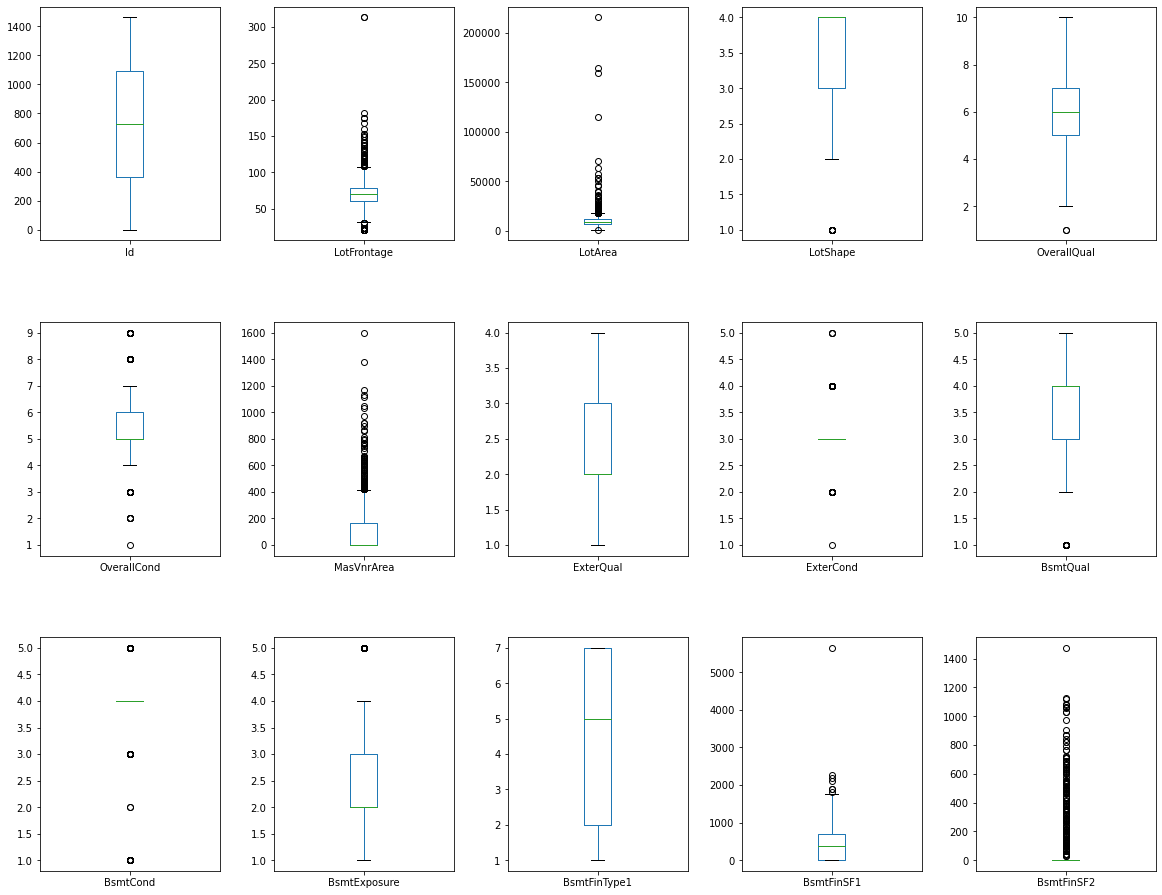

In [66]:
box_plotter(col_list[0:15],3,5)

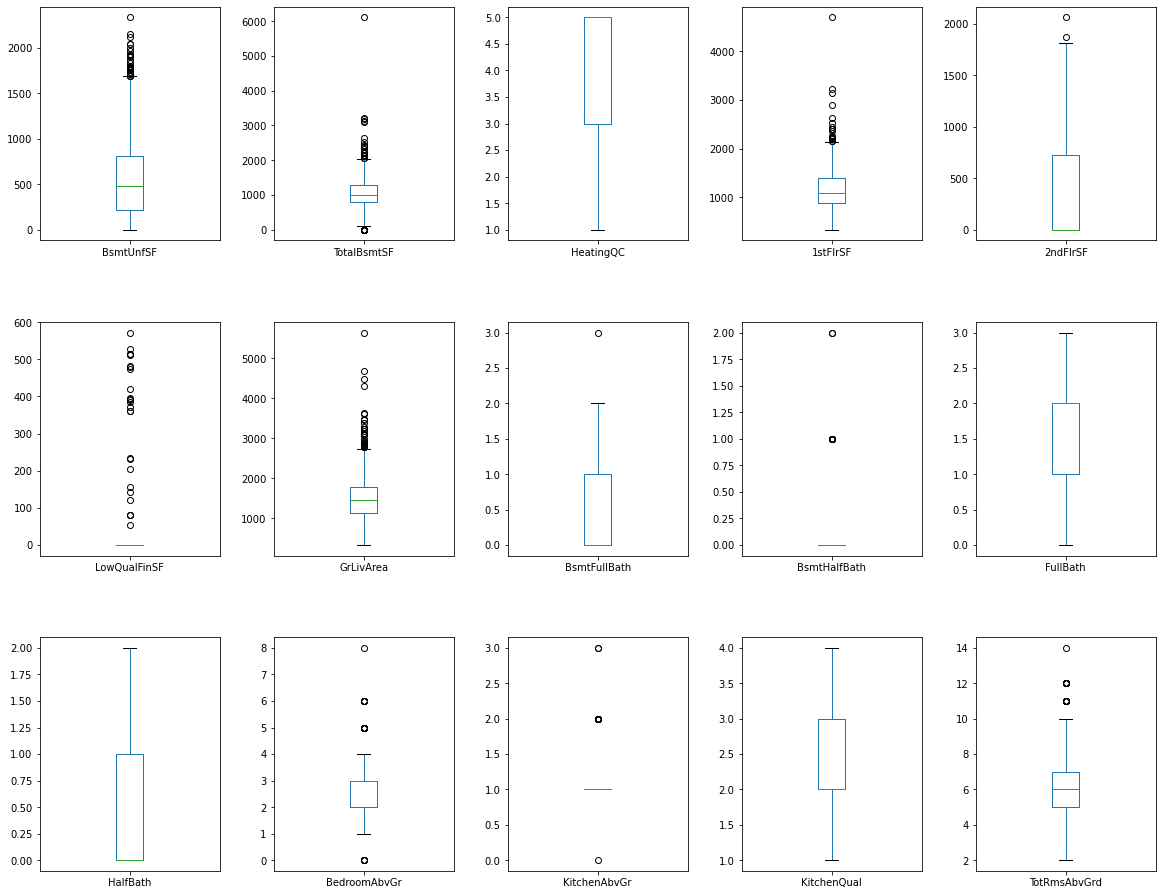

In [67]:
box_plotter(col_list[15:30],3,5)

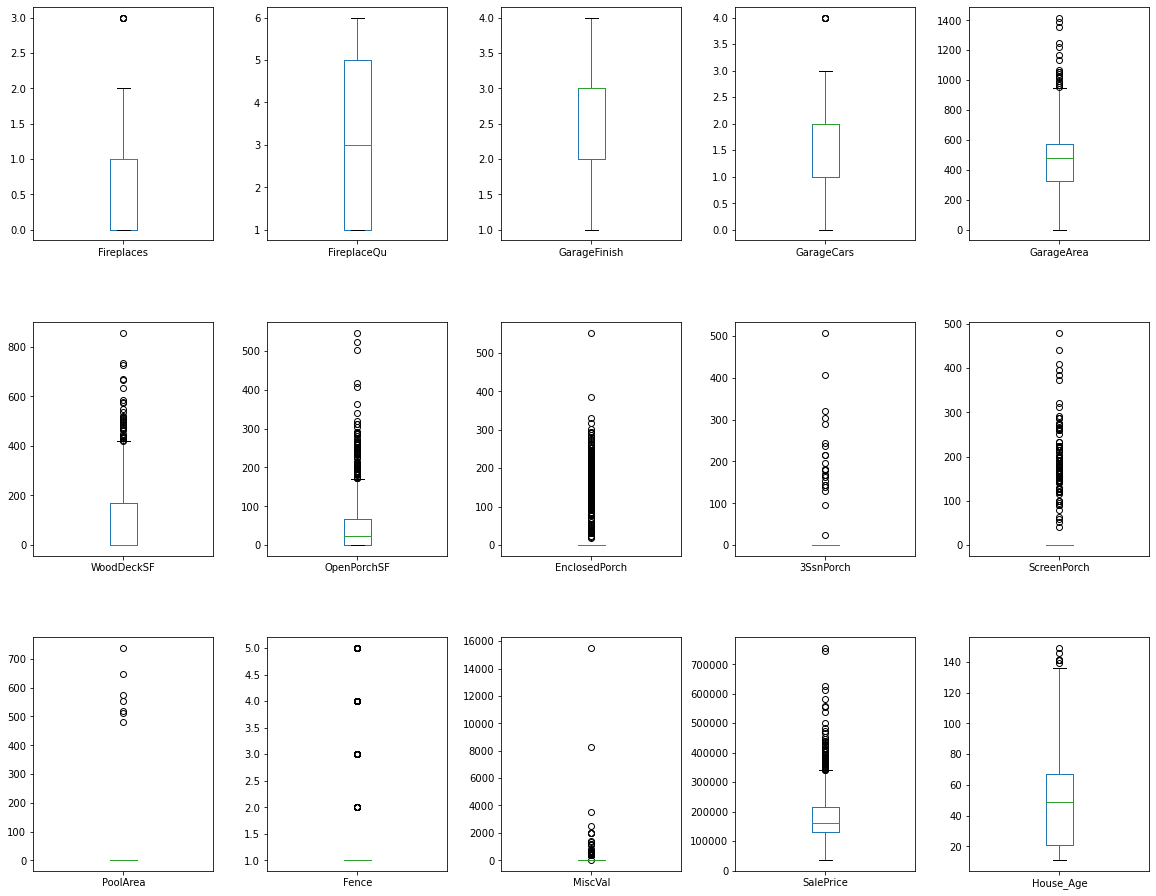

In [68]:
box_plotter(col_list[30:],3,5)

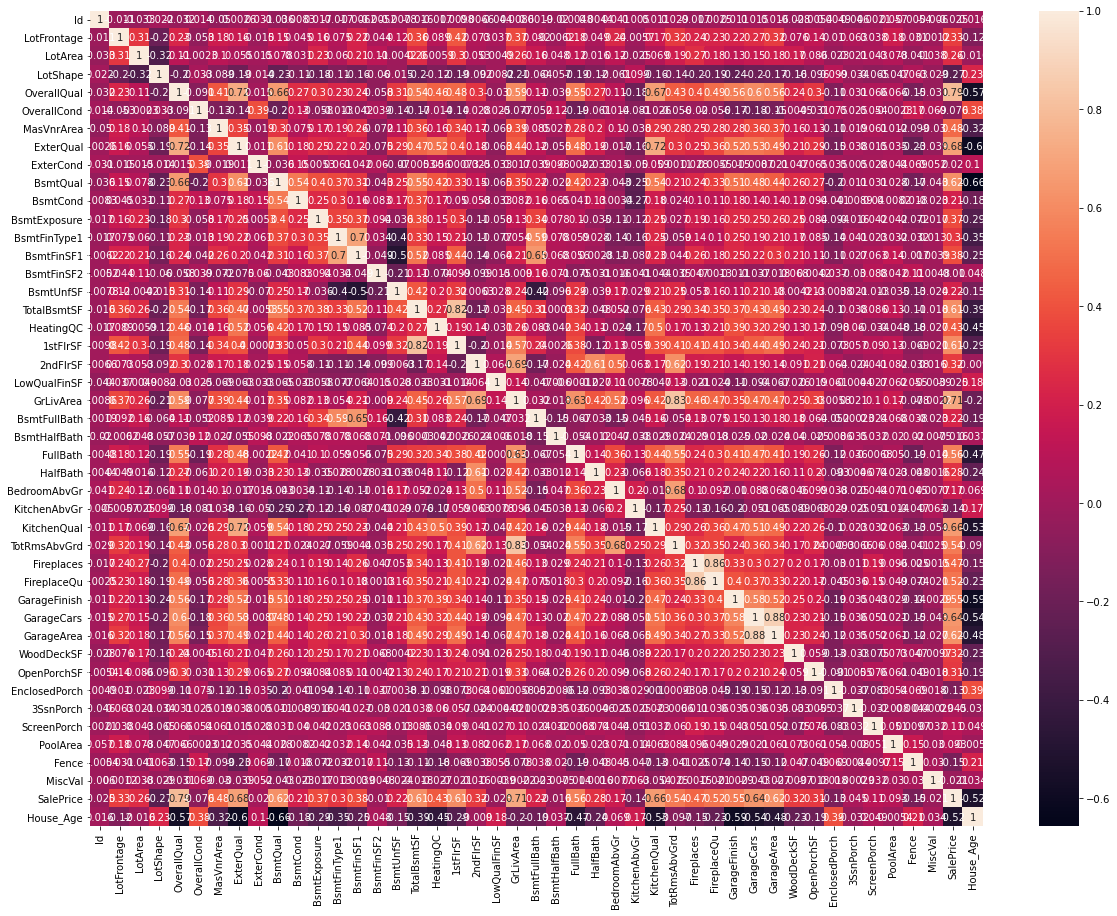

In [69]:
# checking correlation of variables

plt.figure(figsize=(20,15))
sns.heatmap(house_data.corr(), annot=True)
plt.show()

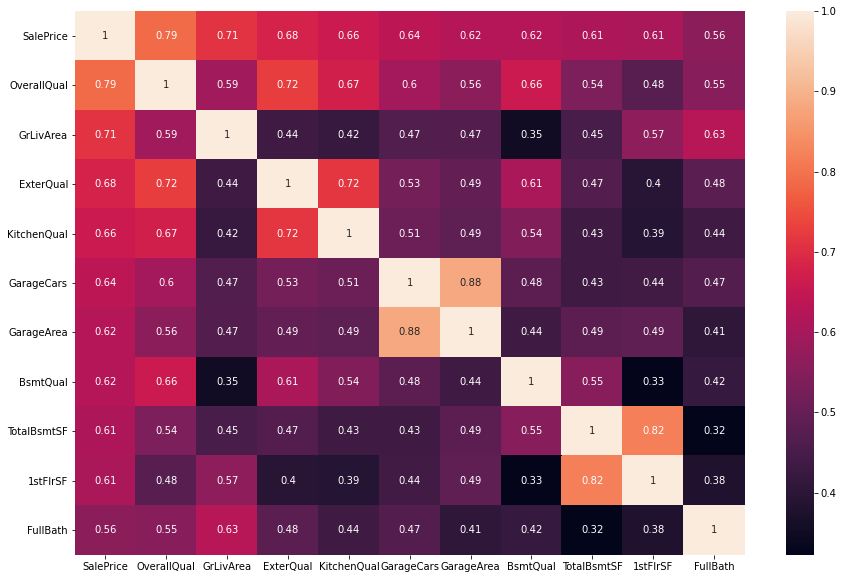

In [70]:
# checking top 10 correlated features to SalePrice

plt.figure(figsize=(15,10))
k = 11
cols = house_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
vals = np.corrcoef(house_data[cols].values.T)
sns.heatmap(vals, yticklabels=cols.values, xticklabels=cols.values, annot=True)
plt.show()

In [71]:
cat_cols = house_data.select_dtypes(include=['object'])
cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'MoSold'], dtype='object')

In [72]:
# dummy encoding for categorical variables

dummies = pd.get_dummies(cat_cols, drop_first=True)
dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_Others,Foundation_PConc,GarageType_Detchd,GarageType_Others,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [73]:
house_data = house_data.drop(list(cat_cols.columns), axis=1)

In [74]:
house_data= pd.concat([house_data, dummies], axis=1)

In [75]:
house_data.columns


Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'MoSold_December', 'MoSold_February', 'MoSold_January', 'MoSold_July', 'MoSold_June', 'MoSold_March', 'MoSold_May', 'MoSold_November', 'MoSold_October', 'MoSold_September'], dtype='object', length=118)

In [76]:
house_data.shape

(1451, 118)

In [77]:
# setting independant & dependant variables as X & y

X = house_data.drop(["Id", "SalePrice"], axis=1)
y = house_data[['SalePrice']]


In [78]:
X.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,House_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_Others,Foundation_PConc,GarageType_Detchd,GarageType_Others,MoSold_August,MoSold_December,MoSold_February,MoSold_January,MoSold_July,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September
0,65.0,8450,4,7,5,196.0,3,3,4,4,2,7,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,3,8,0,1,3,2,548,0,61,0,0,0,0,1,0,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,4,6,8,0.0,2,3,4,4,5,6,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,2,6,1,4,3,2,460,298,0,0,0,0,0,1,0,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,3,7,5,162.0,3,3,4,4,3,7,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,3,6,1,4,3,2,608,0,42,0,0,0,0,1,0,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,3,7,5,0.0,2,3,3,5,2,6,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,3,7,1,5,2,3,642,0,35,272,0,0,0,1,0,106,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,3,8,5,350.0,3,3,4,4,4,7,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,4,3,3,836,192,84,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [79]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [80]:
# perform train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [81]:
# transforming y variable to log to get normal distribution

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log)
y_train = transformer.fit_transform(y_train)
y_test = transformer.transform(y_test)


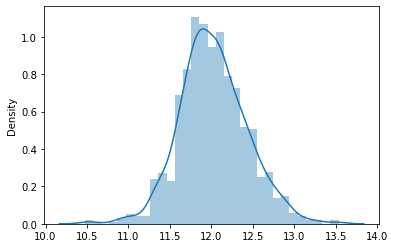

In [82]:
# Saleprice is now normally distributed

sns.distplot(y_train);

In [83]:
# scaling numerical columns

from sklearn.preprocessing import StandardScaler

num_cols =X_train.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [84]:
# using RFE for feature selection since data contains lots of features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
lr.fit(X_train,y_train)


rfe = RFE(lr,30) # choosing 30 features
rfe = rfe.fit(X_train,y_train)


In [85]:
rfe.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False])

In [86]:
# checking columns with False value for support after RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 35),
 ('LotArea', False, 67),
 ('LotShape', False, 73),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 48),
 ('ExterQual', False, 55),
 ('ExterCond', False, 81),
 ('BsmtQual', False, 50),
 ('BsmtCond', False, 37),
 ('BsmtExposure', False, 9),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', False, 21),
 ('BsmtFinSF2', False, 17),
 ('BsmtUnfSF', False, 15),
 ('TotalBsmtSF', False, 16),
 ('HeatingQC', False, 33),
 ('1stFlrSF', False, 18),
 ('2ndFlrSF', False, 14),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 13),
 ('BsmtHalfBath', False, 87),
 ('FullBath', False, 11),
 ('HalfBath', False, 24),
 ('BedroomAbvGr', False, 71),
 ('KitchenAbvGr', False, 6),
 ('KitchenQual', False, 82),
 ('TotRmsAbvGrd', False, 84),
 ('Fireplaces', False, 76),
 ('FireplaceQu', True, 1),
 ('GarageFinish', False, 30),
 ('GarageCars', True, 1),
 ('GarageArea', False, 42),
 ('WoodDeckSF', False, 41),
 ('OpenPorchSF', False, 45),
 ('

In [87]:
# fetching top 30 columns after RFE

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinType1', 'GrLivArea', 'FireplaceQu', 'GarageCars', 'House_Age', 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 'MSSubClass_2-STORY 1946 & NEWER', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'MasVnrType_Stone', 'Foundation_Others', 'MoSold_January'], dtype='object')

In [88]:
# columns to reject after RFE with low support

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'LotShape', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES', 'MSSubClass_1-STORY 1945 & OLDER', 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', 'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Inside', 'LotConfig_Others', 'Neighborhood_BrDale',
 

In [89]:
X_train = X_train[col]
X_test = X_test[col]

In [90]:
X_train.columns

Index(['OverallQual', 'OverallCond', 'BsmtFinType1', 'GrLivArea', 'FireplaceQu', 'GarageCars', 'House_Age', 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 'MSSubClass_2-STORY 1946 & NEWER', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'MasVnrType_Stone', 'Foundation_Others', 'MoSold_January'], dtype='object')

In [91]:
len(X_train.columns)

30

In [92]:
# fitting initial linear regression model

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)

[12.10140662]
[[ 0.10467776  0.05821705  0.04455763  0.14643776  0.0319069   0.05830219
  -0.07707495 -0.09582587 -0.0681718  -0.25180135 -0.20184696 -0.14887907
  -0.07170728  0.05772067 -0.12459136 -0.15292833 -0.07926972 -0.06795881
  -0.06950357 -0.08599475  0.04828338  0.10288468 -0.15970456 -0.09172841
  -0.0898084   0.15459008  0.11321964  0.04341061 -0.05151098 -0.05969936]]


In [93]:
# checking r2 score and RMSE of linear regression model

from sklearn.metrics import r2_score, mean_squared_error

# train r2 score

y_train_pred = lr.predict(X_train)
lr_train_r2 = r2_score(y_train,y_train_pred)
lr_train_r2

0.8864968239789199

In [94]:
# test r2 score

y_test_pred = lr.predict(X_test)
lr_test_r2 = r2_score(y_test,y_test_pred)
lr_test_r2

0.8489554948830417

In [95]:
# train RMSE

lr_train_mse = np.sqrt(mean_squared_error(y_train,y_train_pred)) 
lr_train_mse

0.13643104463213243

In [96]:
# test RMSE

lr_test_mse = np.sqrt(mean_squared_error(y_test,y_test_pred)) 
lr_test_mse

0.15001690066543186

In [97]:
metrics_lr = []
metrics_lr.extend([lr_train_r2,lr_test_r2,lr_train_mse,lr_test_mse])

### Ridge Regression

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [99]:
# initialsing parameter grid

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                    100, 200, 250, 300, 350, 400, 450, 500, 
                    550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]}

In [100]:
# fitting Ridge using GridSearchCV to get optimal hyperparameter (alpha)

ridge = Ridge()

model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=5,
                        verbose=1,
                        return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 250, 300, 350, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# best parameter and score

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.10114011490196032


In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003407,0.001848,0.001808,0.000236,0.0001,{'alpha': 0.0001},-0.114163,-0.099049,-0.093760,-0.101597,-0.098651,-0.101444,0.006846,18,-0.093288,-0.099420,-0.100661,-0.098055,-0.098681,-0.098021,0.002521
1,0.002539,0.000275,0.001495,0.000071,0.001,{'alpha': 0.001},-0.114162,-0.099048,-0.093761,-0.101597,-0.098650,-0.101444,0.006846,17,-0.093288,-0.099420,-0.100660,-0.098055,-0.098681,-0.098021,0.002521
2,0.002423,0.000092,0.001572,0.000140,0.01,{'alpha': 0.01},-0.114158,-0.099041,-0.093766,-0.101596,-0.098639,-0.101440,0.006845,16,-0.093288,-0.099419,-0.100657,-0.098053,-0.098679,-0.098019,0.002519
3,0.002327,0.000092,0.001723,0.000555,0.05,{'alpha': 0.05},-0.114139,-0.099008,-0.093788,-0.101593,-0.098589,-0.101423,0.006839,14,-0.093290,-0.099414,-0.100642,-0.098044,-0.098670,-0.098012,0.002515
4,0.002280,0.000045,0.001446,0.000052,0.1,{'alpha': 0.1},-0.114115,-0.098968,-0.093815,-0.101588,-0.098529,-0.101403,0.006832,13,-0.093292,-0.099406,-0.100625,-0.098033,-0.098660,-0.098003,0.002509
5,0.002351,0.000099,0.001527,0.000086,0.2,{'alpha': 0.2},-0.114070,-0.098892,-0.093865,-0.101579,-0.098429,-0.101367,0.006818,12,-0.093294,-0.099392,-0.100594,-0.098011,-0.098642,-0.097987,0.002499
6,0.002319,0.000122,0.001449,0.000066,0.3,{'alpha': 0.3},-0.114030,-0.098821,-0.093911,-0.101576,-0.098385,-0.101345,0.006802,11,-0.093296,-0.099376,-0.100566,-0.097990,-0.098626,-0.097971,0.002490
7,0.002154,0.000128,0.001419,0.000031,0.4,{'alpha': 0.4},-0.113991,-0.098757,-0.093954,-0.101571,-0.098356,-0.101326,0.006786,10,-0.093298,-0.099361,-0.100555,-0.097972,-0.098616,-0.097961,0.002484
8,0.002129,0.000061,0.001397,0.000027,0.5,{'alpha': 0.5},-0.113953,-0.098695,-0.093994,-0.101565,-0.098331,-0.101308,0.006770,9,-0.093301,-0.099347,-0.100546,-0.097957,-0.098606,-0.097951,0.002479
9,0.002072,0.000030,0.001366,0.000021,0.6,{'alpha': 0.6},-0.113916,-0.098637,-0.094031,-0.101559,-0.098308,-0.101290,0.006755,8,-0.093307,-0.099334,-0.100539,-0.097948,-0.098597,-0.097945,0.002474


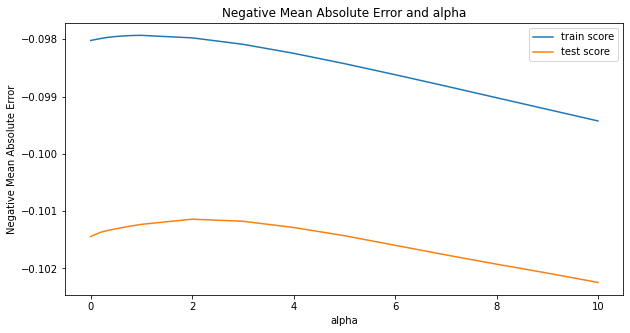

In [103]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting to see how train and test score behaves and choosing alpha that doesnt cause overfitting

plt.figure(figsize=(10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [104]:
# using the best alpha value to fit ridge regression

alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([[ 0.10576165,  0.05805327,  0.0445319 ,  0.14642348,  0.03238214,
         0.05922568, -0.08024435, -0.08925407, -0.06525098, -0.24146542,
        -0.15903768, -0.07659444, -0.0575074 ,  0.06558016, -0.11379771,
        -0.13380706, -0.08355121, -0.0597442 , -0.05979165, -0.07966603,
         0.04625245,  0.09945562, -0.14488412, -0.07452534, -0.07839215,
         0.14500314,  0.1054118 ,  0.04190812, -0.05099871, -0.05787626]])

In [105]:
# checking r2 score and RMSE of ridge regression model

from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = ridge.predict(X_train)
ridge_train_r2 = r2_score(y_train,y_train_pred)
ridge_train_r2

0.8863306213613127

In [106]:
y_test_pred = ridge.predict(X_test)
ridge_test_r2 = r2_score(y_test,y_test_pred)
ridge_test_r2

0.8493366313535807

In [107]:
ridge_train_mse = np.sqrt(mean_squared_error(y_train,y_train_pred)) 
ridge_train_mse

0.136530896031841

In [108]:
ridge_test_mse = np.sqrt(mean_squared_error(y_test,y_test_pred)) 
ridge_test_mse

0.14982750937722533

In [109]:
metrics_ridge = []
metrics_ridge.extend([ridge_train_r2,ridge_test_r2,ridge_train_mse,ridge_test_mse])

### Lasso Regression

In [110]:
from sklearn.linear_model import Lasso

In [111]:
# fitting Lasso using GridSearchCV to get optimal hyperparameter (alpha)

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=5,
                        verbose=1,
                        return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 250, 300, 350, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# best parameter and score

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.10127071027312398


In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=.05]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003377,0.001101,0.001569,0.000226,0.0001,{'alpha': 0.0001},-0.113661,-0.098646,-0.093951,-0.101788,-0.098308,-0.101271,0.006679,1,-0.093325,-0.099317,-0.100477,-0.097879,-0.098562,-0.097912,0.002450
1,0.002631,0.000081,0.001851,0.000546,0.001,{'alpha': 0.001},-0.110991,-0.099388,-0.099809,-0.104303,-0.099452,-0.102788,0.004498,2,-0.096206,-0.100860,-0.102045,-0.099973,-0.100493,-0.099915,0.001976
2,0.002684,0.000293,0.001789,0.000269,0.01,{'alpha': 0.01},-0.123883,-0.108121,-0.115734,-0.117867,-0.116981,-0.116517,0.005048,3,-0.111884,-0.116713,-0.116210,-0.114855,-0.115199,-0.114972,0.001683
3,0.002544,0.000281,0.001525,0.000117,0.05,{'alpha': 0.05},-0.136765,-0.121782,-0.137836,-0.132837,-0.139799,-0.133804,0.006425,4,-0.128457,-0.134749,-0.133829,-0.133242,-0.132364,-0.132528,0.002179


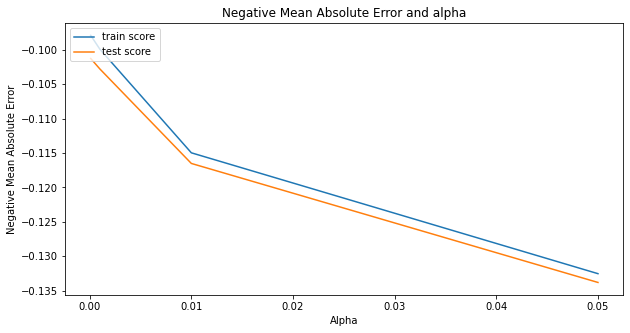

In [114]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting to see how train and test score behaves and choosing alpha that doesnt cause overfitting

plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [115]:
# using the best alpha value to fit lasso regression

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.10609339,  0.05801004,  0.04443523,  0.146514  ,  0.03199336,
        0.05903745, -0.0805178 , -0.08991776, -0.06527803, -0.24711924,
       -0.18036119, -0.04570754, -0.05662768,  0.06478611, -0.11344335,
       -0.13528985, -0.0715647 , -0.05858226, -0.05944331, -0.0791978 ,
        0.04397529,  0.0998829 , -0.1455294 , -0.07337372, -0.0777888 ,
        0.14788026,  0.10607239,  0.0411154 , -0.05029904, -0.05667246])

In [116]:
# checking r2 score and RMSE of lasso regression model

from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = lasso.predict(X_train)
lasso_train_r2 = r2_score(y_train,y_train_pred)
lasso_train_r2

0.8863284979124681

In [117]:
y_test_pred = lasso.predict(X_test)
lasso_test_r2 = r2_score(y_test,y_test_pred)
lasso_test_r2

0.8493040088763366

In [118]:
lasso_train_mse = np.sqrt(mean_squared_error(y_train,y_train_pred)) 
lasso_train_mse

0.13653217128742398

In [119]:
lasso_test_mse = np.sqrt(mean_squared_error(y_test,y_test_pred)) 
lasso_test_mse

0.14984372924542316

In [120]:
metrics_lasso = []
metrics_lasso.extend([lasso_train_r2,lasso_test_r2,lasso_train_mse,lasso_test_mse])

In [121]:
# Creating a table which contain all the metrics of linear, ridge & lasso regression for comparison

final_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RMSE (Train)','RMSE (Test)'], 
            'Linear Regression': metrics_lr,
            'Ridge Regression' : metrics_ridge,
            'Lasso Regression' : metrics_lasso}
            

final_metric = pd.DataFrame(final_table)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.886497,0.886331,0.886328
1,R2 Score (Test),0.848955,0.849337,0.849304
2,RMSE (Train),0.136431,0.136531,0.136532
3,RMSE (Test),0.150017,0.149828,0.149844


***Here we can observe that Lasso is slightly better performing that Ridge in terms of R2 score and RMSE on test data. Also it provides feature selection. Hence going ahead with Lasso regularisation for the problem statement***

### Lets observe the changes in the coefficients after regularization

In [122]:
betas = pd.DataFrame(index=X_train.columns)

In [123]:
betas.rows = X_train.columns

In [124]:
betas['Linear'] = lr.coef_[0]
betas['Ridge'] = ridge.coef_[0]
betas['Lasso'] = lasso.coef_

In [125]:
# dataframe to compare the coefficients of all there models

pd.set_option('display.max_rows', None)
betas.sort_values(['Linear','Ridge','Lasso'], ascending=False)

,Linear,Ridge,Lasso
Neighborhood_StoneBr,0.154590,0.145003,0.147880
GrLivArea,0.146438,0.146423,0.146514
Neighborhood_Veenker,0.113220,0.105412,0.106072
OverallQual,0.104678,0.105762,0.106093
Neighborhood_NridgHt,0.102885,0.099456,0.099883
GarageCars,0.058302,0.059226,0.059037
OverallCond,0.058217,0.058053,0.058010
Neighborhood_Crawfor,0.057721,0.065580,0.064786
Neighborhood_NoRidge,0.048283,0.046252,0.043975
BsmtFinType1,0.044558,0.044532,0.044435


***Some of the features that contribute to SalePrice are Neighbourhood, GrLivArea, OverallQual, MasVnrType, GarageCars etc***